In [2]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#pre-processing

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
import pickle

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from wordcloud import WordCloud
# from spellchecker import SpellChecker

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [4]:
import random

In [5]:
def loadDataTest(path):
    df = pd.read_csv(path, thousands = ',')
    
    return df

## Combining reviews

In [35]:
from pathlib import Path

In [ ]:
android_native_reviews_filename_combined = combine_review("android/native/", 'main_info_new.csv', "android_native" )
android_xamarin_review_filename_combined = combine_review("android/Xamarin/", 'main_info_new.csv', "android_xamarin" )
android_react_review_filename_combined = combine_review("android/react/", 'main_info_new.csv', "android_react" )

ios_native_reviews_filename_combined = combine_review("android/native/", 'main_info_new.csv', "android_native" )
ios_xamarin_review_filename_combined = combine_review("android/Xamarin/", 'main_info_new.csv', "android_xamarin" )
ios_react_review_filename_combined = combine_review("android/react/", 'main_info_new.csv', "android_react" )

In [ ]:
def combine_review(folder_name, main_info, framework_name):
    file_name = 'main_info_new.csv'
    
    combined_df = pd.DataFrame(columns = ['app_name', 'category', 'reviewer_ratings', 'review_body'])
    all_app_df = pd.DataFrame(columns=combined_df.columns)
    # Get all app names
    app_name_category_df = pd.read_csv(folder_name, file_name)

    # Skipping the main_info_new
    csv_list = [f for f in os.listdir(folder_name) if f.startswith('reviews')]
    for csv_name in csv_list:
    #       Get app name from file name
        app_name = csv_name.split('reviews_')[1].split('.csv')[0]
    #         Get the ratings and reviews columns
        df = pd.read_csv(os.path.join(folder_name, csv_name))[['reviewer_ratings', 'review_body']]
    #         Needed for merge
        df ['key'] = 0
    #         Get category and file name from main_info_new. Add no of reviews here. 
        app_category = (app_name_category_df.loc[app_name_category_df['app_name'] == app_name])[['app_name', 'category', 'number_of_downloads']]
        app_category['key'] = 0
    #         Inner join on both
        combined_df = app_category.merge(df, how = 'inner', on = 'key')
        combined_df.drop('key', 1, inplace = True)
        all_app_df = pd.concat([all_app_df, combined_df])
        
        for index, row in all_app_df.iterrows():
            if row['category'] in {'Communication', 'Photography', 'Medical', 'Music & Audio', 'Photography', 'Shopping', 'Tools', 'Travel & Local'}:
                row['category'] = 'Utilities'
            elif row['category'] in {'Education', 'Entertainment', 'Food & Drink', 'Health & Fitness', 'Lifestyle', 'Social', 'Sports'}:
                row['category'] = 'Entertainment'
            elif row['category'] in {'Business', 'Events', 'Finance', 'News & Magazines', 'Weather'}:
                row['category'] = 'News'
            elif row['category'] in {'Adventure','Board', 'Educational', 'Puzzle'}:
                row['category'] = 'Games'

            #Update these values to whatever you need
            if row['number_of_downloads'] in {'100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+', '100000+', '100,000+'}:
                row['number_of_downloads'] = 'low'
            elif row['number_of_downloads'] in {'500,000+', '5,000,000+', '1,000,000+'}:
                row['number_of_downloads'] = 'medium'
            elif row['number_of_downloads'] in {'10,000,000+', '50,000,000+', '100,000,000+'}:
                row['number_of_downloads'] = 'high'
            elif row['number_of_downloads'] in {'500,000,000+','1,000,000,000+','5,000,000,000+'}:
                row['number_of_downloads'] = 'very high'
                
                
        all_app_df.to_csv("Combined"+framework_name + '_combined.csv', index = False)
        return all_app_df

## Distribution of start ratings

In [ ]:
def print_subplot_popularity(df_native, df_react, df_xamarin, popularity_level)    
    labels = ['positive', 'neutral', 'negative']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, list((df_native.loc[review['reviewer_ratings'] == popularity_level]).value_counts(ascending=True), width, label='native')
    rects2 = ax.bar(x + width/2, list((df_react.loc[review['reviewer_ratings'] == popularity_level]).value_counts(ascending=True), width, label='react')
    rects3 = ax.bar(x + width/2, list((df_xamarin.loc[review['reviewer_ratings'] == popularity_level]).value_counts(ascending=True), width, label='xamarin')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('log base 10 of avg no of ratings per app')
    ax.set_title('No of ratings across popularity' + popularity_level)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    return plt

### Facebook

In [33]:
#adding column in the df for rating category
def sentiment(reviews_without_sentiment):
    if row['reviewer_ratings'] > 3:
        return "pos"
    if row['reviewer_ratings'] < 3:
        return "neg"
    if row['reviewer_ratings'] == 3:
        return "neu"
    return "na"
    

In [7]:
android_native_reviews_filename = ""
android_xamarin_review_filename = ""
android_react_review_filename = ""

ios_native_reviews_filename = ""
ios_xamarin_review_filename = ""
ios_react_review_filename = ""

android_native_without_sentiment = loadDataTest("Native_android_apps_reviews/nativeAppsReviews/" + android_native_reviews_filename +".csv")
android_xamarin_without_sentiment = loadDataTest("Native_android_apps_reviews/nativeAppsReviews/" + android_xamarin_review_filename +".csv")
android_react_without_sentiment = loadDataTest("Native_android_apps_reviews/nativeAppsReviews/" + android_react_review_filename +".csv")

ios_native_without_sentiment = loadDataTest("Native_android_apps_reviews/nativeAppsReviews/" + ios_native_reviews_filename +".csv")
ios_xamarin_without_sentiment = loadDataTest("Native_android_apps_reviews/nativeAppsReviews/" + ios_xamarin_review_filename +".csv")
ios_react_without_sentiment = loadDataTest("Native_android_apps_reviews/nativeAppsReviews/" + ios_react_review_filename +".csv")


android_native_without_sentiment['rating_category'] = android_native_without_sentiment.apply(lambda row: sentiment(row), axis=1)
android_xamarin_without_sentiment['rating_category'] = android_xamarin_without_sentiment.apply(lambda row: sentiment(row), axis=1)
android_react_without_sentiment['rating_category'] = android_react_without_sentiment.apply(lambda row: sentiment(row), axis=1)

ios_native_without_sentiment['rating_category'] = ios_native_without_sentiment.apply(lambda row: sentiment(row), axis=1)
ios_xamarin_without_sentiment['rating_category'] = ios_xamarin_without_sentiment.apply(lambda row: sentiment(row), axis=1)
ios_react_without_sentiment['rating_category'] = ios_react_without_sentiment.apply(lambda row: sentiment(row), axis=1)


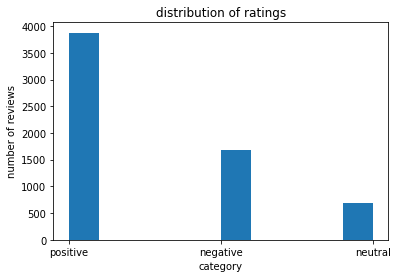

In [8]:
plt.hist(reviews['rating_category'])
plt.ylabel("number of reviews")
plt.xlabel("category")
plt.title("distribution of ratings")
plt.show()

## Analysis of main_info files

In [16]:
df_native_apps = loadDataTest("Native_android_apps_reviews/main_info_new.csv")
df_cross_apps = loadDataTest("Xamarin_and_React_apps_reviews/main_info.csv")

### number of ratings for each popularity category

In [17]:
df_native_apps["number_of_downloads_category"] = df_native_apps.apply (lambda row: label_popularity(row), axis=1)
df_cross_apps["number_of_downloads_category"] = df_cross_apps.apply (lambda row: label_popularity(row), axis=1)

[7322.0, 57789.26666666667, 1764889.4324324324, 6868196.642857143]

In [28]:
from math import log

no_of_ratings_cross = avg_no_of_ratings(df_cross_apps)
no_of_ratings_native = avg_no_of_ratings(df_native_apps)

no_of_ratings_cross = [log(y,10) for y in no_of_ratings_cross]
no_of_ratings_native = [log(y,10) for y in no_of_ratings_native]

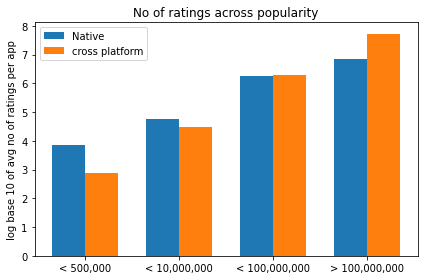

In [54]:
labels = ['< 500,000', '< 10,000,000', '< 100,000,000', '> 100,000,000']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_of_ratings_native, width, label='Native')
rects2 = ax.bar(x + width/2, no_of_ratings_cross, width, label='cross platform')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('log base 10 of avg no of ratings per app')
ax.set_title('No of ratings across popularity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

In [14]:
def label_popularity (row):
    if row['number_of_downloads'] == '10,000+' or row['number_of_downloads'] == '100,000+' :
        return 1
    if row['number_of_downloads'] == '500,000+' or row['number_of_downloads'] == '5,000,000+' or row['number_of_downloads'] == '1,000,000+':
        return 2
    if row['number_of_downloads'] == '10,000,000+' or row['number_of_downloads'] == '100,000,000+' or row['number_of_downloads'] == '50,000,000+':
        return 3
    if row['number_of_downloads'] == '5,000,000,000+' or row['number_of_downloads'] == '500,000,000+' or row['number_of_downloads'] == '1,000,000,000+':
        return 4
    return 0

In [15]:
def avg_no_of_ratings(df):
    num_apps_popularity = [0,0,0,0]
    num_rating_popularity = [0,0,0,0]
    avg_rating_popularity = [0,0,0,0]

    for index, row in df.iterrows():
        if row['number_of_downloads_category'] == 1:
            num_apps_popularity[0] += 1
            num_rating_popularity[0] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 2:
            num_apps_popularity[1] += 1
            num_rating_popularity[1] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 3:
            num_apps_popularity[2] += 1
            num_rating_popularity[2] += row['number_of_ratings']
        if row['number_of_downloads_category'] == 4:
            num_apps_popularity[3] += 1
            num_rating_popularity[3] += row['number_of_ratings']

#     print(num_rating_popularity)
#     print(num_apps_popularity)

    return [x/y for x, y in zip(num_rating_popularity, num_apps_popularity)]


## Word Cloud

#### Manual cleaning, Stop word removal, punctuation removal, stemming

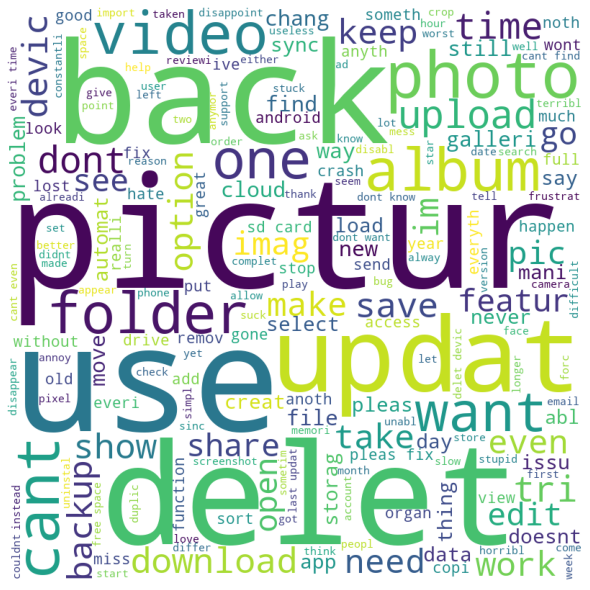

In [51]:
review = loadDataTest("Native_android_apps_reviews/nativeAppsReviews/reviews_Google Photos.csv")

Cleaned_reviews = textCleaning_with_appname(review.loc[review['reviewer_ratings'] == 1], "Google Photos")

get_word_cloud(Cleaned_reviews).show()


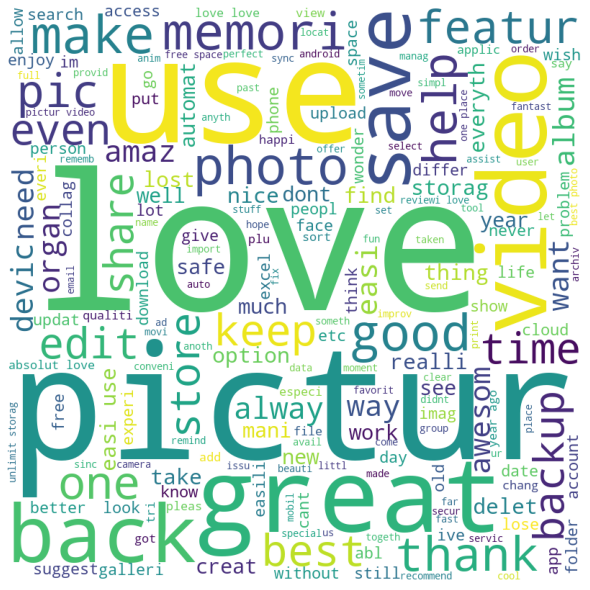

In [52]:
Cleaned_reviews = textCleaning_with_appname(review.loc[review['reviewer_ratings'] == 5], "Google Photos")

get_word_cloud(Cleaned_reviews).show()

In [43]:
def textCleaning(df):

    df2 = df.copy()
    all_stop_words = set(stopwords.words('english'))
    all_stop_words.update({"app", "phone"} )
    stop_words = all_stop_words
    ps = PorterStemmer()
    
    df3 = pd.DataFrame(columns=['review'])
    previous_app_name = ""
    for index, row in df2.iterrows():
    
        app_name = row['app_name']
        if(app_name != previous_app_name):
            stop_words = all_stop_words
            more_words = get_more_words(app_name)
            previous_app_name = app_name
            stop_words.update(more_words)
        
        row['review'] = row['review'].lower()
        row['review'] = re.sub(r'(<e>|<a>|</e>|</a>|<e/>|<a/>)', " ", row['review'])
        row['review'] = re.sub(r'[,.\/#!$%\^&\*;:{}=\'\-_`~()><:@"“”?]',"", row['review'])
        row['review'] = word_tokenize(row['review'])
            
        #stemming and stop word removal
        correct = ""
        for w in row['review']:    
            if (w in stop_words or len(w) == 1):
                continue
            word = ps.stem(word)
            correct += " " + word
              
        df3.loc[index] = [correct]
        
    return df3

def textCleaning_with_appname(df, app_name):

    df2 = df.copy()
    all_stop_words = set(stopwords.words('english'))
    all_stop_words.update({"app", "phone"})
    all_stop_words.update(get_more_words(app_name))
    ps = PorterStemmer()
    
    df3 = pd.DataFrame(columns=['review_body'])
    previous_app_name = ""
    for index, row in df2.iterrows():
        
        row['review_body'] = row['review_body'].lower()
        row['review_body'] = re.sub(r'(<e>|<a>|</e>|</a>|<e/>|<a/>)', " ", row['review_body'])
        row['review_body'] = re.sub(r'[,.\/#!$%\^&\*;:{}=\'\-_`~()><:@"“”?]',"", row['review_body'])
        row['review_body'] = word_tokenize(row['review_body'])
            
        #stemming and stop word removal
        correct = ""
        for w in row['review_body']:    
            if (w in all_stop_words or len(w) == 1):
                continue
            w = ps.stem(w)
            correct += " " + w
              
        df3.loc[index] = [correct]
        
    return df3

In [45]:
 def get_word_cloud(Cleaned_reviews):
    comment_words = " "
    for index, row in Cleaned_reviews.iterrows():
        comment_words = comment_words+Cleaned_reviews.loc[index]['review_body'] + " "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
    #                 stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    return plt

In [46]:
def get_more_words(app_name):
    new_words = set()
    new_words.add(app_name)
    new_words.add(app_name.lower())
    
    name_list = app_name.split()
    initials = ""
    for words_in_name in name_list:
        new_words.add(words_in_name)
        new_words.add(words_in_name.lower())
        initials += words_in_name[0]
        
    new_words.add(initials.lower())
    new_words.add(initials.upper())

    return new_words
    

In [70]:
list(reviews['rating_category'].value_counts(ascending=True))

[691, 1673, 3876]